<a href="https://colab.research.google.com/github/bryandaetz1/Data_Viz_Assignments/blob/main/Scatterplot_Assignment1_BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from vega_datasets import data
from matplotlib import pyplot as plt

In [24]:
df = data.movies()
df.head()

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time min,Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


In [25]:
df.shape

(3201, 16)

In [26]:
df.dtypes

Title                      object
US Gross                  float64
Worldwide Gross           float64
US DVD Sales              float64
Production Budget         float64
Release Date               object
MPAA Rating                object
Running Time min          float64
Distributor                object
Source                     object
Major Genre                object
Creative Type              object
Director                   object
Rotten Tomatoes Rating    float64
IMDB Rating               float64
IMDB Votes                float64
dtype: object

In [27]:
df.isna().sum()

Title                        1
US Gross                     7
Worldwide Gross              7
US DVD Sales              2637
Production Budget            1
Release Date                 0
MPAA Rating                605
Running Time min          1992
Distributor                232
Source                     365
Major Genre                275
Creative Type              446
Director                  1331
Rotten Tomatoes Rating     880
IMDB Rating                213
IMDB Votes                 213
dtype: int64

In [28]:
df['MPAA Rating'].value_counts()

R            1194
PG-13         865
PG            354
Not Rated      94
G              79
NC-17           8
Open            2
Name: MPAA Rating, dtype: int64

In [29]:
df['MPAA Rating'] = df['MPAA Rating'].str.replace('Open','Not Rated')
df['MPAA Rating'].fillna('Not Provided', inplace = True)

In [30]:
df['US Gross'].sort_values(ascending = False).head()

1234    760167650.0
2970    600788188.0
1266    533345358.0
912     460998007.0
2741    441226247.0
Name: US Gross, dtype: float64

In [31]:
df_viz = df[df['US Gross'] > 150000000].reset_index(drop = True)

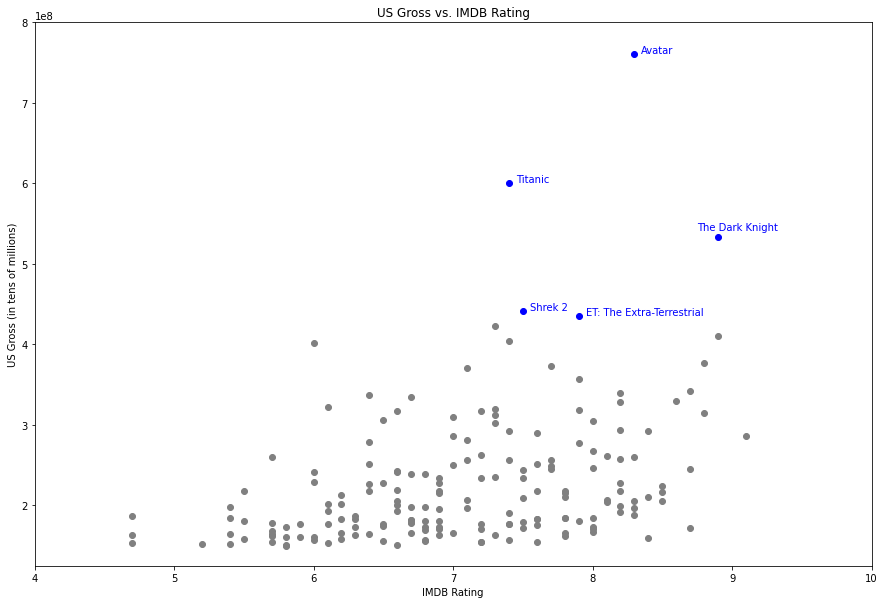

In [33]:
plt.figure(figsize=(15,10))

for i, title in enumerate(df_viz['Title']):
  if df_viz['US Gross'][i] > 430000000 and df_viz['IMDB Rating'][i] < 8.5:
    plt.scatter(df_viz['IMDB Rating'][i], df_viz['US Gross'][i], color = 'blue')
    plt.annotate(title, (df_viz['IMDB Rating'][i] + 0.05, df_viz['US Gross'][i] + 1000000), color = 'blue')
  elif df_viz['US Gross'][i] > 430000000 and df_viz['IMDB Rating'][i] > 8.5:
    plt.scatter(df_viz['IMDB Rating'][i], df_viz['US Gross'][i], color = 'blue')
    plt.annotate(title, (df_viz['IMDB Rating'][i] - 0.15, df_viz['US Gross'][i] + 9000000), color = 'blue')
  else:
    plt.scatter(df_viz['IMDB Rating'][i], df_viz['US Gross'][i], color = 'grey')

plt.xlabel('IMDB Rating')
plt.ylabel('US Gross (in tens of millions)') 
plt.title('US Gross vs. IMDB Rating')
plt.ylim(125000000, 800000000)
plt.xlim(4, 10)
plt.show()